In [14]:
import pandas as pd
import numpy as np
# Para medición del tiempo que toma ejecutar los procesos
from time import time
# Para separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Libreria para SVM
from sklearn.svm import SVC
# Medición de precisión
from sklearn.metrics import accuracy_score, confusion_matrix
# Generar gráficos
import matplotlib.pyplot as plt



In [ ]:
diabetes_df = pd.read_csv('/content/diabetes.csv')

diabetes_df.info()

In [ ]:
diabetes_df.head(2)

In [ ]:
# Contar los valores únicos de una columna en un DataFrame
diabetes_df['Outcome'].value_counts()

En este caso, tenemos muchas más muestras de pacientes diagnosticados sin diabetes (0). Esto podría representar un problema para las predicciones de nuestra SVM, pues estará sesgada a predecir más resultados de la clase que contiene más muestras.


Para empezar el proceso de entrenamiento, es necesario separar las características (X) de las etiquetas (y). El objetivo de todo el análisis es poder predecir una etiqueta y, contando únicamente con las características (y). La SVM se encargará de aprender la relación que existe entre X y y.

In [ ]:
# Crearemos un nuevo df llamado X (notar mayus) con las columnas de características
# Se obtiene generando una lista de columnas del df a utilizar

lista_caract = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

# Luego tomando esa lista del df original
X = diabetes_df[lista_caract]

# Mostramos los resultados
X.head()

In [ ]:
# Utilizaremos el mismo procedimiento para generar y
lista_etiq = ['Outcome']

Y = diabetes_df[lista_etiq]

Y.head()

Ahora que tenemos nuestros objetos de X y y, procederemos a separarlos en conjuntos de entrenamiento (que serviran para aprender) y prueba (para validadr que el aprendizaje sea correcto.


Este proceso será realizado con la función train_test_split que importamos al inicio del documento. Por defecto, esta función tomará 25% (0.25) de nuestro conjunto total de datos como prueba y el resto para entrenamiento.

In [8]:
# Separar en datos de entrenamiento y datos de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
# Mostraremos la cantidad de datos a utilizar para el entrenamiento
X_train.shape

In [ ]:
# Luego, la cantidad de datos a utilizar para validar
X_test.shape

In [ ]:
# Luego, la cantidad de datos a utilizar para validar
Y_test.shape

Creación de la SVM

Utilizaremos la clase SVC (Support Vector Classifier) que importamos al inicio. Como vimos en la introducción, existen diversos tipos de kernel que podemos utilizar para crear una SVM. En este caso tomaremos un kernel lineal (en sklearn linear) para que el entrenamiento sea rápido.

In [9]:
# Definición del modelo que llamaremos clf 'clasificación'
clf = SVC(kernel='linear')

El entrenamiento de un modelo en sklearn es bastante sencillo. Basta con llamar el método fit para encontrar las relaciones entre nuestra X y y. El único inconveniente es que el método fit recibe valores de tipo array, pero nuestros datos actualmente se encuentran contenidos en objetos de tipo pandas.DataFrame (df). Para convertir un df en un array, basta con tomar el atributo values del mismo df.


In [ ]:
# Guardamos el registro del momento en el que empezamos el entrenamiento
hora_inicio = time()

# Iniciamos el entrenamiento ejecutando el metodo fit
# Los valores que enviamos son los valores de X y y
#
# El .ravel() que final de y.values es un pequeño truco para cambiar su forma
# esto permite convertir una matriz de dos dimensiones en una sola dimesión,
# con ello, cada elemento de esta nueva matriz corresponde a un registro de X

# fit() -> entrena y ajuste los valores

clf.fit(X_train.values, Y_train.values.ravel())

# Imprimimos el tiempo tomado para el entrenamiento
print('Entrenamiento terminado en {} segundos'.format(time() - hora_inicio))

Una vez terminado el entrenamiento, es necesario medir su precisión. Para ello, intentaremos predecir los datos de nuestra y de prueba utilizando nuestra X de prueba. A estos datos les llamaremos y_pred, pues contendrán nuestra predicción.

In [ ]:
# Otra vez guardaremos registro del tiempo que nos toma crear esta predicción
hora_inicio = time()

# Iniciamos la predición con nuestra X de prueba
y_pred = clf.predict(X_test)
print('Entrenamiento terminado en {} segundos'.format(time() - hora_inicio))

Una vez terminada nuestra predicción, podemos comparar su precisión con la función accuracy_score. Esto se encargará de mostrarnos el porcentaje de predicciones correctas realizadas por nuestro modelo.

In [ ]:
# Evaluamos la precisión
accuracy_score(Y_test, y_pred)

En este caso, la precisión del modelo fue relativamente aceptable (0.79). Sin embargo, debido a que los datos de aprendizaje fueron muy pocos (cerca de 500) y que estaban muy sesgados hacia la clase más representada (la gente sin diabetes), es posible que no funcione bien en muchos casos.

**Matriz de confusión**

Una matriz de confusión nos ayuda a tener una mejor idea del rendimiento de nuestro modelo. Se encarga de comparar la cantidad de aciertos de cada clase de nuestros datos de prueba (y_test en este caso) y nuestros datos calculados (y_pred en este caso).

In [ ]:
# La función confusion_matrix recibe las "respuestas correctas" y nuestras predicciones
# genera una matriz que indica, para cada clase, la cantidad de predicciones correctas e incorrectas

conf_diabetes = confusion_matrix(Y_test, y_pred)
conf_diabetes

Debido a que es poco complicado comprender la matriz únicamente de forma numérica, vamos a crear una función que lo muestre de forma gráfica.



In [19]:
def plot_cm(cm, clases):
    """Esta función se encarga de generar un gráfico con nuestra matriz de confusión.
    cm es la matriz generada por confusion_matrix
    classes es una lista que contiene las posibles clases que puede predecir nuestro modelo
    """

    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks = np.arange(len(clases))
    plt.xticks(tick_marks, clases, rotation=45)
    plt.yticks(tick_marks, clases)
    thresh = cm.max() / 2

    for indice_fila, fila in enumerate(cm):
      for indice_columna, columna in enumerate(fila):
        if cm[indice_fila, indice_columna] > thresh:
          color = 'white'
        else:
          color = 'black'
        plt.text(
            indice_columna,
            indice_fila,
            cm[indice_fila, indice_columna],
            color = color,
            horizontalalignment = 'center'
        )
    plt.ylabel('Valores reales')
    plt.xlabel('Valores calculados')
    plt.show()


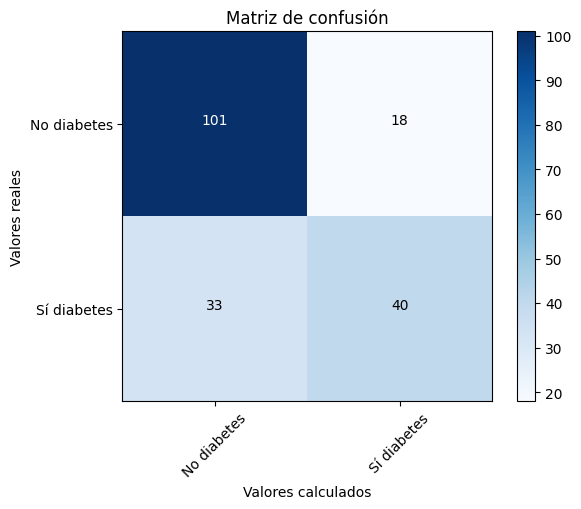

In [20]:
# Generamos el gráfico llamando la función que creamos y enviando los parámetros
# cm = nuestra matriz de confusión (conf_diabetes)
# classes = las clases a predecir (si tienen diabetes o no)

plot_cm(conf_diabetes, ['No diabetes', 'Sí diabetes'])